In [1]:
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt
from scipy import signal
import scipy.stats as stats
from statsmodels.tsa import api as tsa
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
import h5py


In [2]:
X = rand.randn(10000)
t = np.linspace(3, 5, num = 10000)

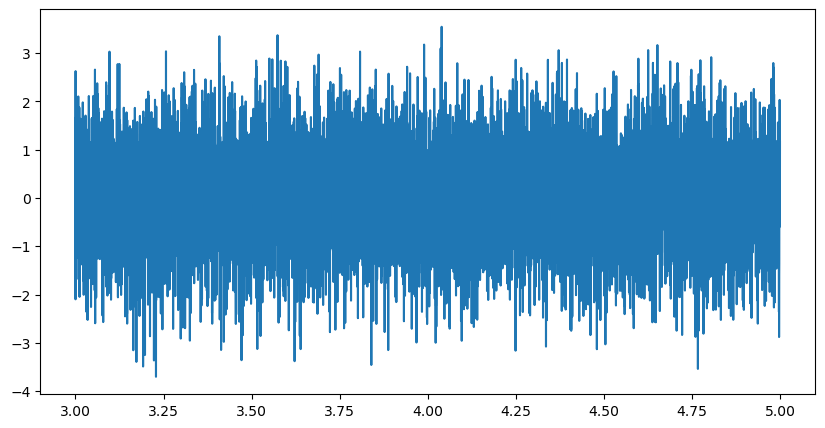

In [3]:
plt.figure(figsize = (10, 5))
plt.plot(t, X)

Мат. ожидание

In [4]:
M = np.mean(X).round(5)

def average(X):
    return (np.sum(X)/len(X)).round(5)

assert average(X) == M

In [5]:
D = np.var(X).round(5)

def var(X, M):
    return (np.sum((X - M)**2)/len(X)).round(5)

assert var(X, M) == D

In [15]:
from scipy.stats import skew

A = skew(X).round(6)

def assim(X):
    m3 = np.sum((X - np.mean(X))**3)/len(X)
    sigm3 = np.square(np.var(X))**3
    return (m3/sigm3).round(6)

print(A, assim(X))

-0.030288 -0.03004


In [20]:
from scipy.stats import kurtosis

E = kurtosis(X, fisher=False, bias = False).round(3)

def exx(X):
    m4 = np.sum((X - np.mean(X))**4)/len(X)
    sigm4 = np.square(np.var(X))**4
    return (m4/sigm4).round(3)

print(E, exx(X))

3.049 3.015


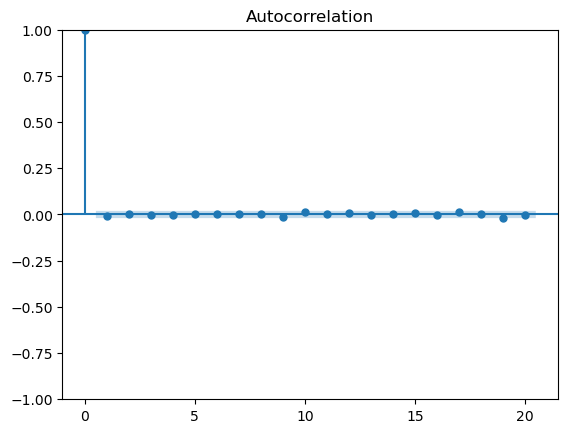

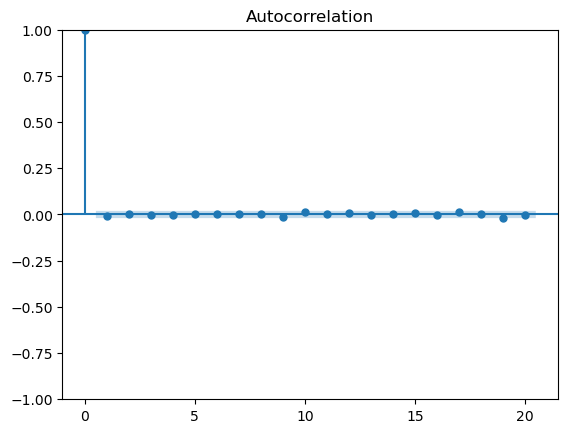

In [21]:
plot_acf(X, lags = 20)

<StemContainer object of 3 artists>

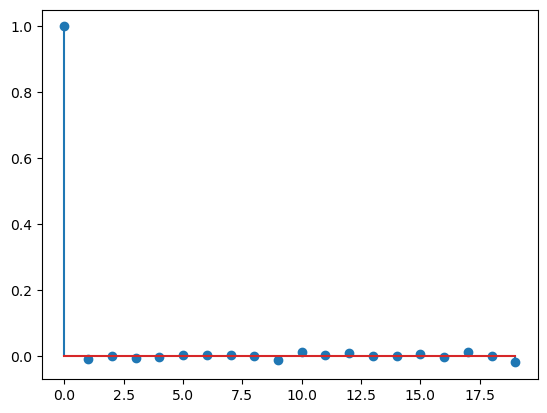

In [57]:
h = np.correlate(X, X, mode = 'full')[len(X)-1:]/len(X)/np.var(X)

plt.stem(h[:20])

In [63]:
C = np.sum(X - np.mean(X))/len(X)*np.sum(X[20:] - np.mean(X))/len(X)
p = C/np.var(X)
print(p)

3.5591103019315575e-21


**Вариант 15**

In [114]:
Xmat = h5py.File('15.mat', 'r')
Xmat = Xmat.get('z15')
Xmat = np.array(Xmat)
Xmat.ravel()

array([ 0.2       ,  1.        ,  1.58433327,  1.40080979,  1.07078338,
        0.79266879,  0.63645271,  0.42124849,  0.20614961,  0.16348728,
        0.71531704,  0.9530096 ,  1.06928085,  0.5107262 ,  0.1442154 ,
       -0.082578  , -0.29682447, -0.20024906, -0.11214918,  0.41693345,
        0.74535549,  0.869539  ,  0.51847386,  0.0336383 , -0.23828917,
       -0.68480879, -0.97059543, -0.85939651, -0.60945605, -0.59659778,
       -0.38994657, -0.34635565, -0.39133945, -0.52421646, -0.50273664,
       -0.32565497, -0.46371708, -0.76557173, -0.92133862, -1.14394664,
       -0.71182485, -0.02951914,  0.48883501,  0.61669776,  0.59949732,
        0.68148718,  0.66081279,  0.6293393 ,  0.46394032,  0.33367886,
        0.05943531, -0.69253293, -1.15685023, -1.62998521, -1.09847001,
       -0.28696006,  0.49420444,  0.94153197,  1.3807353 ,  1.47642644,
        1.57197303,  1.28659522,  0.72898132,  0.26818384,  0.03823994,
       -0.21961952, -0.14940077, -0.05839446, -0.02058712, -0.07

In [115]:
Xmat = Xmat.ravel()

Вычисление количественных характеристик

In [116]:
M = np.mean(Xmat).round(5)

def average(X):
    return (np.sum(X)/len(X)).round(5)

assert average(Xmat) == M

In [117]:
D = np.var(Xmat).round(5)

def var(X, M):
    return (np.sum((X - M)**2)/len(X)).round(5)

assert var(Xmat, M) == D

In [125]:
A = skew(Xmat).round(6)

def assim(X):
    m3 = np.sum((X - np.mean(X))**3)/len(X)
    sigm3 = np.square(np.var(X))**3
    return (m3/sigm3).round(6)

print(A, assim(Xmat))

E = kurtosis(Xmat, fisher=False, bias = False).round(3)

def exx(X):
    m4 = np.sum((X - np.mean(X))**4)/len(X)
    sigm4 = np.square(np.var(X))**4
    return (m4/sigm4).round(3)

print(E, exx(Xmat))

0.100466 2.233056
2.571 158.793


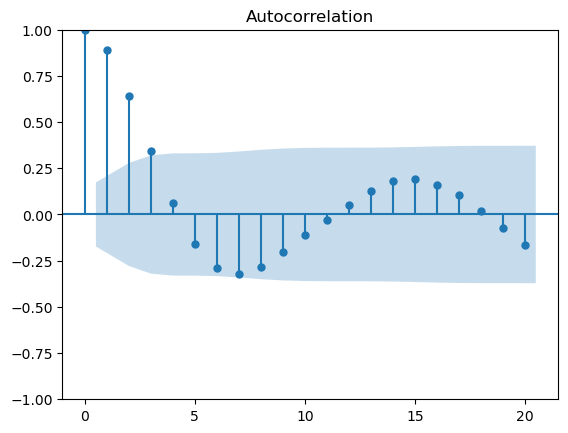

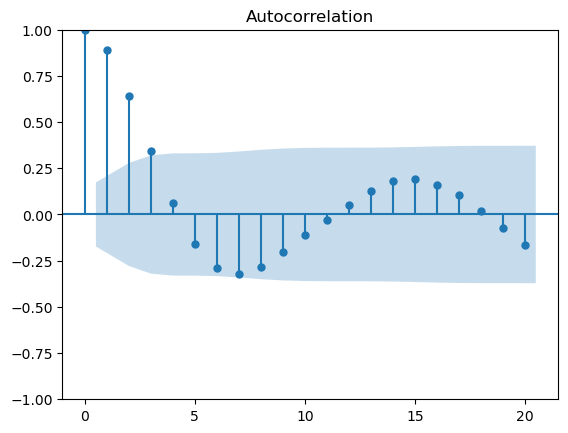

In [119]:
plot_acf(Xmat, lags = 20)

<StemContainer object of 3 artists>

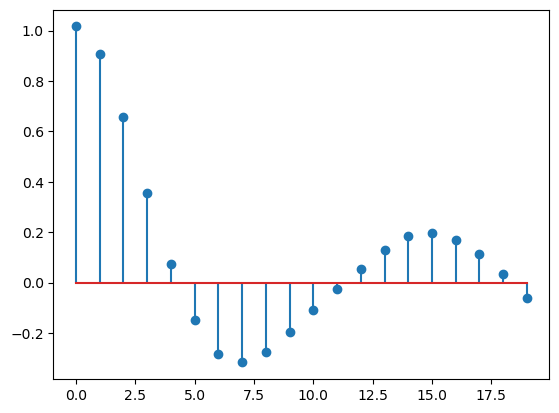

In [121]:
h1 = np.correlate(Xmat, Xmat, mode = 'full')[len(Xmat)-1:]/len(Xmat)/np.var(Xmat)

plt.stem(h1[:20])

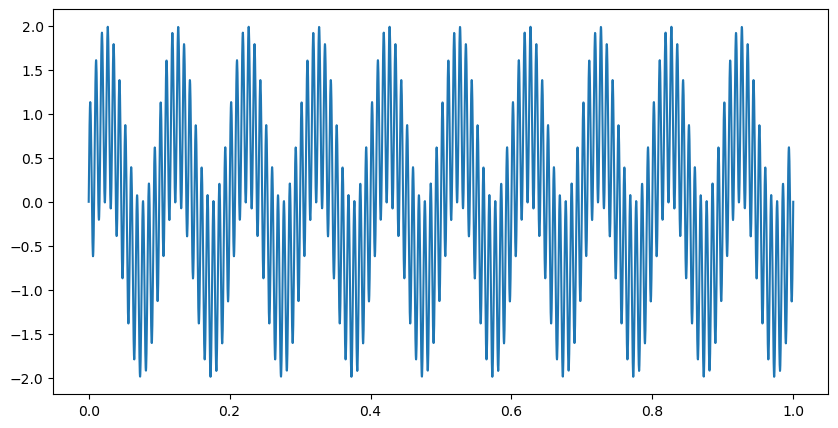

In [126]:
t = np.linspace(0, 1, 4096)
x1 = np.sin(2*np.pi*10*t) + np.sin(2*np.pi*120*t)
plt.figure(figsize = (10, 5))
plt.plot(t, x1)
plt.show()